In [1]:
import json

with open('output/executions/36/simulations/cortex_1/1/bin_rates_B.json', 'r') as j:
     contents = json.loads(j.read())

In [3]:
times = list(map(int, list(contents.keys())))
values = list(contents.values())
values = [x for _, x in sorted(zip(times, values))]
times = sorted(times)

window_size = 10
i = window_size//2
ma = []

values = values+values+values+values
values = [0 for x in range(window_size//2)] + values + [0 for x in range(window_size//2)]

while i < (len(values) - window_size//2):
    
    window = values[(i - window_size//2) : (i + window_size//2)]
    window_average = round(sum(window) / window_size, 2)
    
    ma.append(window_average)
    
    i += 1

print(len(values))
print(len(ma))
  

2262
2252


9008
2252


ValueError: x and y must have same first dimension, but have shapes (9008,) and (2252,)

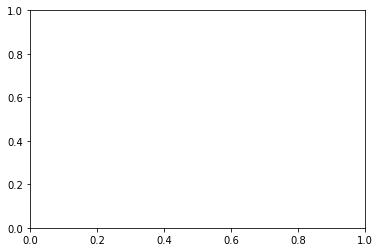

In [5]:
import matplotlib.pyplot as plt
times = times+[t+3000 for t in times]+[t+6000 for t in times]+[t+9000 for t in times]
print(len(times))
print(len(ma))
plt.plot(times, ma)

In [17]:
def divide_into_trials(seq, size):
    return [seq[int(pos):(int(pos) + int(size))] for pos in range(0, len(seq), int(size))]

In [27]:
values = [2,3,4,5,6,7,1,1,1,1,3,4,5,6]
threshold = 4
trial_time = 10
bin_size = 2
elements_for_trial = trial_time/bin_size
values_into_trials = divide_into_trials(values, elements_for_trial)
response_times = []
print(values_into_trials)
for values_index, trial_values in enumerate(values_into_trials):
    time_ids = [time_id for time_id, value in enumerate(trial_values) if value >= threshold]
    if len(time_ids):
        first_time_id = time_ids[0]
        print(first_time_id)
        actual_time = (values_index*trial_time)+(first_time_id*bin_size)
        response_times.append(actual_time)
print(response_times)

[[2, 3, 4, 5, 6], [7, 1, 1, 1, 1], [3, 4, 5, 6]]
2
0
1
[4, 10, 22]


RESPONSE TIMES:  [150, 295, 215, 300, 335, 260, 335, 330, 260, 335, 255, 510, 260, 255, 515, 260, 335, 335, 250, 335]
[1 1 3 5 2 6 0 0 0 2] 20


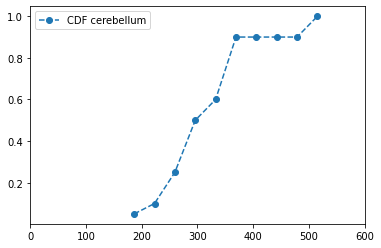

In [14]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json

with open('output/executions/171/simulations/cerebellum_simple/1/bin_rates_DCN_complete.json', 'r') as j:
    bin_rates = json.loads(j.read())

ma_rates = moving_average_plot_no_save(bin_rates)

trial_time = 3000
bin_size = 5

# print('MA RATES: ', ma_rates)

th = 0.1
response_times = []
resp = calculate_response_times(ma_rates, th, trial_time, bin_size)
for rt in resp:
    response_times.append(rt%1000)

print('RESPONSE TIMES: ', response_times)

# CDF plot for spike times
import numpy as np
import matplotlib.pyplot as plt

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    try:
        print(count, sum(count))
        pdf = count / sum(count)
    except:
        pdf = 0
    cdf = np.cumsum(pdf)
    return bins_count, cdf

bins_count, cdf = cdf_calc(response_times)
  
plt.xlim(0, 600)
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, '--o', label="CDF cerebellum")
plt.legend()
plt.show()